# Regression Homework

This is the first assignment for CAP 4630 and we will develop two basic models with regression. \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 100 Points)**


**Task Overview:**
- Singal Variable Nonlinear Regression
- Multiple Variable Linear Regression


PID: 512376\
Name: Rhami Thrower\
Colaboration: N/A

## 1 - Packages ##

Import useful packages for scientific computing and data processing. **(5 Points)**

**Tasks:**
1. Import numpy and rename it to np.
2. Import pandas and rename it to pd.
3. Import the pyplot function in the libraray of matplotlib and rename it to plt.

References:
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

**Attention:**
1. After this renaming, you will use the new name to call functions. For example, **numpy** will become **np** in the following sections.


In [ ]:
# Coding here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2 - Data Preparation ##

Prepare the data for regression task. **(10 Points)**

**Tasks:**
1. Load data for nonlinear regression.
2. Generate the scatter plot of the data.

**Hints:**
1. The data file is "data_nonlinear.csv".
2. The data format is as follows: 1st column is X and 2nd column is Y.

I split into two blocks is that ok?

In [ ]:
# Coding here
# upload need csv for AI applications
from google.colab import files
#please upload both files
uploaded = files.upload()

Saving data_two_variables.csv to data_two_variables (1).csv
Saving data_nonlinear.csv to data_nonlinear (1).csv


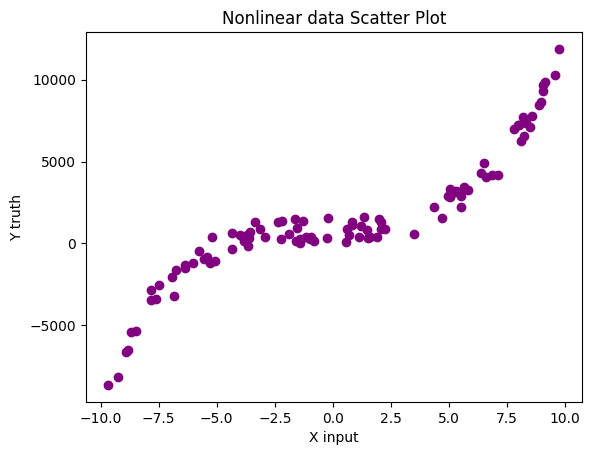

In [ ]:
from re import X
""" Scatter plot time """
# load data into pd list
data = pd.read_csv("data_nonlinear.csv");
df = pd.DataFrame(data = data)

#use plt to create scatter plot
X = df['X']
Y  = df['Y']
scatter_plot = plt.scatter(X,Y, color = "purple")
scatter_plot = plt.title("Nonlinear data Scatter Plot")
scatter_plot = plt.xlabel("X input")
scatter_plot = plt.ylabel("Y truth")
plt.show(scatter_plot)

## 3 - Single Variable Nonlinear Regression ##


Develop a regression model, estimate coefficients with data, and derive the relationship. **(30 Points)**

**Tasks:**
1. Establish a relationship between Y and X with a cubic function.
2. Compute MSE loss with observation-prediction pairs.
3. Implement **Gradient Descent (GD)** to achieve optimal solution with the learning rate of **0.000001 (1e-6)** and **10000 (1e4)** epochs.
4. Print out the optimal solution at final step.

**Hints:**  
1. Given the example of linear regression in class, modify the function to an equation for a spline with coefficients of **a** , **b**, **c** and **d** for cubic, qudractic, linear, and constant term.
2. Initialize the model with zero. For example, a=0, b=0, c=0 and d=0.
3. It may take **10-15 seconds**  to finish the running for 10000 steps. Be patient.
4. For debugging, the results of **a**, **b**, **c**, **d** for first five steps are as follows:

Epoch  0 :  2.8045093168662314 0.15006631239563697 0.04047903434004733 0.0030023401200892003 \
Epoch  1 :  4.905935374329749 0.2803623842843468 0.07068280026181122 0.0057565282228493 \
Epoch  2 :  6.480417434500056 0.395779237410925 0.09318576969022647 0.008323648642107889 \
Epoch  3 :  7.65996806232127 0.49998280146312246 0.10991745268097952 0.010749486523089888 \
Epoch  4 :  8.543527816733905 0.5957208253596222 0.12232397430880633 0.013068360586717544



In [ ]:
# Coding here
def regression():
  a = 0
  b = 0
  c = 0
  d = 0
  lr = 1e-6
  epochs = int(1e4)
  loss = []
  params = []
  for n in range(epochs):
    y_pred = a* X**3 + b * X**2 + c * X + d
    diff_sum = np.sum(Y - y_pred)
    #partial derivatives
    d_a = -2/len(X) * np.sum(X**3 * (Y - y_pred))
    d_b = -2/len(X) * np.sum(X**2 *(Y - y_pred))
    d_c = -2/len(X) * np.sum(X * (Y - y_pred))
    d_d = -2/len(X) * diff_sum

    a = a - lr * d_a
    b = b - lr * d_b
    c = c - lr * d_c
    d = d - lr * d_d
    loss.append((1/(n+1))*diff_sum)

  return a,b,c,d,loss

a,b,c,d,loss = regression()
y_pred = a* X**3 + b * X**2 + c * X + d
print('Precictions: \n', y_pred,'\nfinal Loss:\t', loss[-1])


Precictions: 
 0       17.586861
1    -2525.852088
2      707.932686
3       15.539353
4     2418.489651
         ...     
95   -1321.174419
96      19.213106
97   -1147.677059
98      -0.648177
99    1907.203132
Name: X, Length: 100, dtype: float64 
final Loss:	 3.7922947732490604


## 4 - Prediction Results ##

Derive prediction function and generate estmated results. **(5 Points)**

**Tasks:**
1. Derive prediction function with the obtained coefficients above.
2. Generate scatter plots for original data pairs X-Y and prediction results X-Y_Pred in the same figure.

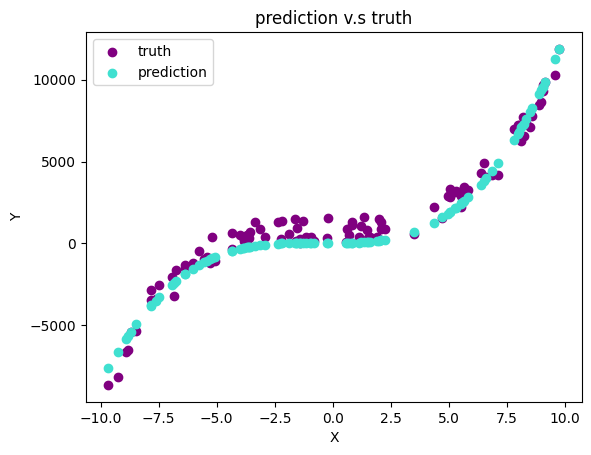

In [ ]:
# Coding here
plt.scatter(X,Y,label = "truth", color = "purple")
plt.scatter(X,y_pred, label = "prediction", color = "turquoise")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("prediction v.s truth")
plt.legend()
plt.show()

## 5 - Multiple Variables Linear Regression ##

## 5.1 Data Preparation

Prepare the data for regression task. **(10 Points)**

**Tasks:**
1. Load data for multiple variable linear regression.
2. Generate the 3D scatter plot of the data.

**Hints:**
1. The data file is "data_two_variables.csv".
2. The data format is as follows: 1st column is X1, 2nd column is X2, and 3rd colum is Y.
3. You may use "mplot3d" in the toolkit of "mpl_toolkits" and import "Axes3D" to faciliate 3D scatter plot. More details can be found in the reference of https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
4. [Optional, NO Credit]You may rotate the figure you generated by using "%matplotlib qt" before you plot it. Remember to install the related package by "!pip install PyQt5". Only work on Jupyter(locally). Does not work on Google Colab. [Reference Website](https://stackoverflow.com/questions/14261903/how-can-i-open-the-interactive-matplotlib-window-in-ipython-notebook)

![](https://drive.google.com/uc?export=view&id=1sHwWfZXpU3-8SqzFrmCxIvxmQWfe2Nns)
![](https://drive.google.com/uc?export=view&id=1OwHP0g-K2um-LnKiDhE6UfkDFxk4Opce)


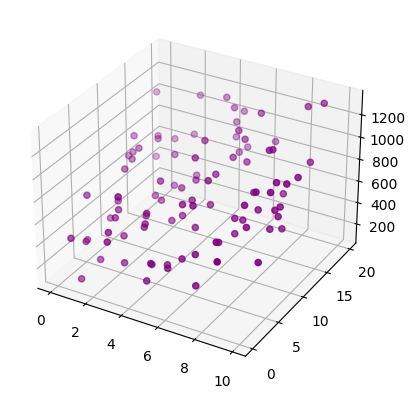

In [ ]:
# Coding here
from mpl_toolkits import mplot3d as plt3d
from mpl_toolkits.mplot3d import Axes3D
multVar_data = pd.read_csv("data_two_variables.csv")
multVar_df = pd.DataFrame(data = multVar_data)
X1 = multVar_df['X1']
X2 = multVar_df['X2']
Y = multVar_df['Y']
#produce graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1,X2,Y, c = "purple")



## 5.2 Linear Regression

Develop a regression model, estimate coefficients with data, and derive the relationship. **(30 Points)**

**Tasks:**
1. Establish a linear function to describe the relationship among Y, X1, and X2.
2. Compute MSE loss with observation-prediction pairs.
3. Implement **Gradient Descent (GD)** to achieve optimal solution with the learning rate of **0.001 (1e-3)** and **10000 (1e4)** epochs.
4. Print out the optimal solution at final step.


**Hints:**  
1. Given the example of linear regression in class, modify the function to a linear equation with two independent variables X1 and X2. The coefficients of X1 and X2 are **m1** and **m2**, respectively. The constant term is **m3**.
2. Initialize the model with zero. For example, m1=0, m2=0, and m3=0.
3. It may take **10-15 seconds**  to finish the running for 10000 steps. Be patient.
4. For debugging, the results of **m1**, **m2**, and **m3** for first five steps are as follows:

Epoch 0: 7.43847600018326 15.595631430047339 1.4265844915879997 \
Epoch 1: 12.954483113402425 26.731746959534096 2.481143659135288 \
Epoch 2: 17.084193849045587 34.664109745712814 3.2680146970514863 \
Epoch 3: 20.213137348549306 40.2953527521597 3.8622050343066556 \
Epoch 4: 22.618552798604984 44.274269323103674 4.317638791453634 \
Epoch 5: 32.734943422646175 34.69592128962032 222.91661391579638

In [ ]:
# Coding here
loss.clear() #clears loss before it is used again
def regression3d():
  m1 = 0
  m2 = 0
  m3 = 0
  lr = 1e-3
  epochs = int(1e4)
  loss = []
  for n in range(epochs):
    y_pred = m1*X1 + m2*X2 + m3
    diff_sum = np.sum(Y - y_pred)
    #partial derivatives
    d_m1 = -2/len(X1) * np.sum((Y - y_pred) * X1)
    d_m2 = -2/len(X2) * np.sum((Y - y_pred) * X2)
    d_m3 = -2/(len(X1)) * diff_sum

    m1 = m1 - lr * d_m1
    m2 = m2 - lr * d_m2
    m3 = m3 - lr * d_m3

    loss.append((1/(n+1)) * diff_sum)
  return m1,m2,m3, loss

m1,m2,m3,loss = regression3d()
print('predictions:', y_pred, '\nfinal Loss:\t', loss[-1])
y_pred = m1*X1 + m2*X2 +m3


predictions: 0       17.586861
1    -2525.852088
2      707.932686
3       15.539353
4     2418.489651
         ...     
95   -1321.174419
96      19.213106
97   -1147.677059
98      -0.648177
99    1907.203132
Name: X, Length: 100, dtype: float64 
final Loss:	 0.01760749694693094



## 5.3 - Prediction Results ##

Derive prediction function and generate estmated results. **(10 Points)**

**Tasks:**
1. Derive prediction function with the obtained coefficients above.
2. Generate 3D scatter plots for original data pairs X-Y and prediction results X-Y_Pred in the same figure.

**Hint:**
1. You may follow the example above.
2. An example is shown below.
![](https://drive.google.com/uc?export=view&id=1xAl7eJmDmFPTNipd0SljAdyHs3PhRiMg)
![](https://drive.google.com/uc?export=view&id=1Eb9qZqTCmAbwJUkoTQ6zPys3ezWqTCkr)

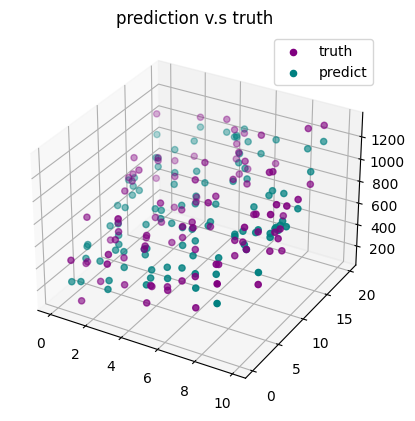

In [ ]:
# Coding here
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1,X2,Y, label = 'truth', c = "purple")
ax.scatter(X1,X2,y_pred, label = 'predict', c = "teal")
plt.title("prediction v.s truth")
plt.legend()
plt.show()